In [1]:
# -*- coding: utf-8 -*-
# learning
# author: Cheng Zheng

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine learning algorithms
from sklearn.linear_model import Ridge #Ridge regression

# Cross-validation
'''
GridSearchCV = Perform an optimization of the parameters. 可以保证在指定的参数范围内找到精度最高的参数
                1. search for the best parameters for model; 
                2. automatically fit a new model on the training dataset w/ the parameters that 
                    can yield the best cross-validation performance.
cross_val_score = to implement cross-validation in scikit-learn.
KFold: just to divide the dataset.
    - When an integer is passed to the cv parameter of cross_val_score():
        cv=int (same as cv=StratifiedKFold(n_splits=int)) is used if the estimator is a classifier 
        and y is either binary or multiclass; In all other cases, KFold is used.
'''
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

path = os.getcwd()#get current path
path_up1Dir = os.path.dirname(path)#go up one directory
dataset = pd.read_excel(path_up1Dir +'/x_TotalArea_y_MVPA/x_TotalArea_y_MVPA.xlsx')#to import the preprocessed dataset into a variable

print(dataset)

     Unnamed: 0  Subject  Vision Surface         X         Y
0             0        1    Open    Firm -0.922794  0.702471
1             1        1  Closed    Firm -0.929073  0.702471
2             2        1    Open    Foam -0.673078  0.702471
3             3        1  Closed    Foam -0.453918  0.702471
4             4        2    Open    Firm -0.941319 -0.368982
..          ...      ...     ...     ...       ...       ...
639         639      162    Open    Foam  0.332269 -0.287135
640         640      163  Closed    Firm -0.806407 -0.517795
641         641      163    Open    Foam -0.112514 -0.517795
642         642      163    Open    Firm -0.797555 -0.517795
643         643      163  Closed    Foam -0.049677 -0.517795

[644 rows x 6 columns]


In [2]:
X = dataset['X']
y = dataset['Y']
other = pd.DataFrame(dataset.iloc[:,:4])
print(X, y, other)

0     -0.922794
1     -0.929073
2     -0.673078
3     -0.453918
4     -0.941319
         ...   
639    0.332269
640   -0.806407
641   -0.112514
642   -0.797555
643   -0.049677
Name: X, Length: 644, dtype: float64 0      0.702471
1      0.702471
2      0.702471
3      0.702471
4     -0.368982
         ...   
639   -0.287135
640   -0.517795
641   -0.517795
642   -0.517795
643   -0.517795
Name: Y, Length: 644, dtype: float64      Unnamed: 0  Subject  Vision Surface
0             0        1    Open    Firm
1             1        1  Closed    Firm
2             2        1    Open    Foam
3             3        1  Closed    Foam
4             4        2    Open    Firm
..          ...      ...     ...     ...
639         639      162    Open    Foam
640         640      163  Closed    Firm
641         641      163    Open    Foam
642         642      163    Open    Firm
643         643      163  Closed    Foam

[644 rows x 4 columns]


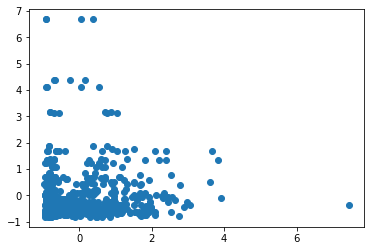

In [3]:
plt.scatter(X, y)
plt.show()

In [4]:
X_ = X.values.reshape(-1, 1) # some algorithms need to reshape X if X has a single feature

In [7]:
# Ridge regression
'''
这里不用分X_train和y_train; 提前分割/交叉验证/自动调参的时候才需要。
What is cross-validation?
    - A statistical method of evaluating generalization performance 
        through regrouping the original dataset to multiple training sets (for training) and test sets (for evaluation).
Why cross-validation?
    - To reduce the possibility in overfitting. e.g. When doing the ridge regression, 
        the more accurate the alpha, the better the model. However, the better the model, it's easier to overfit.
        In order to solve this overfitting, we need to use K-fold cross-validation to verify.
    - To evaluate how well a given algorithm will generalize when trained on a specific dataset.
Why not leave-one-out but 10-Fold?
    - Even though leave-one-out's distribution is the closest to the original sample (just lack one sample), 
        the complexity has increased due to the number of models and our data is not deficient. 
        So, we chose 10-Fold instead to avoid the limitations of fixed datasets (reason 4 not do train_test_split), 
        since different divisions will result in different optimal models to evaluate our models.
What is 10-Fold?
    - first, split the data into ten parts of (approximately) equal size, called folds;
    - second, train a sequence of models. 
        The first one is using first fold as test set and the remaining folds (2-10) as training set, 
        and then use the model to evaluate the accuracy. 
        And similarily repeat for the other 9 model to eventually get 10 accuracy values.
'''

'''
# ridge要考虑的参数是alpha，通过GridSearchCV我们需要确定param_grid也就是这个参数有哪些值才能找到最佳模型。
# np.logspace用于创建等比数列, 开始点和结束点是10的幂, 
    i.e. logspace(-2,1,4)表示起始数字为10^-2，结尾数字为10^1即10，元素个数为4的等比数列
'''
# Set param_grid, aka the main parameters in Ridge
param_grid_Ridge = {
    'alpha':np.logspace(-3,2,10)
}

# GridSearchCV
ridge = GridSearchCV(estimator=Ridge(), # algorithm - Ridge regression
                    param_grid=param_grid_Ridge, # specify the parameters to search over using a dict or list of dictionaries
                    cv=10 # 10-Fold
                    )

# Build the model
ridge.fit(X_, y)

# Output the best parameter, cross-validation score, estimator, and the index of best estimator.
print("\n------------------ Ridge Regression Model")
print("Best parameter: {}".format(ridge.best_params_))
print("Best cross-validation score: {:.2f}".format(ridge.best_score_))
print("Best estimator: {}".format(ridge.best_estimator_))
print("The Index of Best estimator: {}".format(ridge.best_index_))


------------------ Ridge Regression Model
Best parameter: {'alpha': 100.0}
Best cross-validation score: -0.19
Best estimator: Ridge(alpha=100.0)
The Index of Best estimator: 9


In [9]:
# Use the above optimal parameters to build new model
ridge = Ridge(alpha=100.0).fit(X_, y)

In [ ]:
# Draw the Ridge Regression
